In [1]:
from numpy import *
import operator

In [5]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels


In [13]:
def classify0(inX,dataSet,labels,k):
    dataSetSize = dataSet.shape[0]  #获取训练集中对象个数，在这个例子中，对象数量为4
    diffMat = tile(inX,(dataSetSize,1)) - dataSet  #通过tile进行数组拓展，然后计算数组之差
    sqDiffMat = diffMat**2           #计算方差 y = (x1-x2)^2  + (y1-y2)^2
    sqDistance = sqDiffMat.sum(axis=1)  #沿着第2轴空间将数据求和，[4,3]的数组将被压缩成 4行数据
    distances = sqDistance**0.5      #计算标准差  y = sqrt[y]
    sortedDistIndicies = distances.argsort()  #得到结果数据的排序结果

    classCount = {}                       #创建一个字典对象

    for i in range(k):                  #对前k个结果进行排序处理
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1 #这里使用了字典方法Get，当对象不存在时使用默认值0   

    sortedClassCount = sorted(classCount.items(),
    key = operator.itemgetter(1),reverse=True)

    return sortedClassCount[0][0]

In [12]:
group,labels = createDataSet()
datasize = group.shape[0]
test = [0,0.2]
diffMat = tile(test,(datasize,1)) - group

diffMat = diffMat **2
sqDistance = diffMat.sum(axis = 1)
distance = sqDistance ** 0.5
sortedDisIndex = distance.argsort()

classCount = {}

for i in range(3):
    voteLabel = labels[sortedDisIndex[i]]
    classCount[voteLabel] = classCount.get(voteLabel,0) +1   
    
sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse = True)

sortedClassCount[0]

('B', 2)

directionary.items将以列表形式返回字典中的所有项
operator.itemgetter为函数定义
sorted方法可以接收单参数（items）或者多参数（items,key,reverse）
    其中key来指定用items中的第几个对象进行排序工作

In [2]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()     #移除字符串首尾空格
        listFromLine = line.split('\t')#依据换行符分隔字符串
        returnMat[index,:] = listFromLine[0:3] #数组复制
        classLabelVector.append(int(listFromLine[-1]))  #数组拓展
        index += 1
    return returnMat,classLabelVector

In [4]:
#分离特征数据和标签 分别到 dataMat 和 Labels
datingDataMat, datingLabels = file2matrix(".\SourceCode\Ch02\datingTestSet2.txt")
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

In [7]:
import matplotlib
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

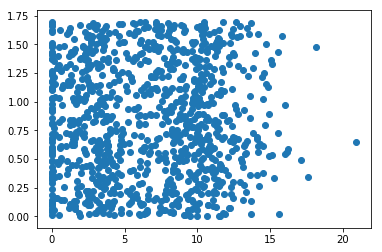

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.show